In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#making statistical graphics
import seaborn as sns

#after execute code immediatly execute charts
%matplotlib inline

In [3]:
#import data set
data = pd.read_csv('heart.csv')

In [4]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#returns the first n rows for the object based on position.
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
print('The shape of our features is:', data.shape)

The shape of our features is: (303, 14)


In [17]:
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values count"]) # gets a dataset with all of the columns and the number of Null values in it
null["Null values percentage"]=(data.isna().sum()/len(data)*100) # adds a column with the % of the Null out of all of the column
null = null[null["Null values percentage"] > 0] # keep only the ones that has Null values
null.style.background_gradient() # prints it in a pretty way

,Null Values count,Null values percentage


In [18]:
data.iloc[:, 0].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [19]:
data.iloc[:, 1].unique()

array([1, 0], dtype=int64)

In [21]:
data.iloc[:, 2].unique()

array([3, 2, 1, 0], dtype=int64)

In [22]:
data.iloc[:, -1].unique()

array([1, 0], dtype=int64)

In [23]:
#Data preprosessing

In [25]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [95]:
#Trainnig model
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import confusion_matrix

91.8
Testing Accuracy for Random Forest: 0.9180327868852459


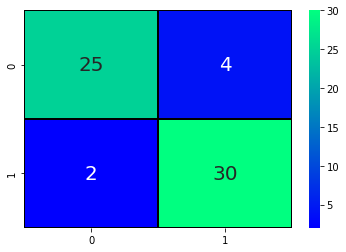

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
regressor=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model = regressor.fit(x_train, y_train)
prediction=model.predict(x_test)
prediction = model.predict(x_test)
cm=confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(round(accuracy_score(prediction,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))

In [109]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [123]:
test_data = (72,1,125,200,150,1.3,1,2.2,2,0,1,2)
input_as_numpy=np.asarray(test_data)
input_reshaped=input_as_numpy.reshape(1,-1)
predict=regressor.predict(input_reshaped)
if(predict == 1): 
  print("The patient may have a heart disease ")
else:
  print("The patient is Normal ")

The patient is Normal 


In [133]:
test_data = (82,120,100,0,0,163,0,0.6,2,0,0,0)
input_as_numpy=np.asarray(test_data)
input_reshaped=input_as_numpy.reshape(1,-1)
pre=regressor.predict(input_reshaped)
if(pre == 1): 
  print("The patient may have a heart disease ")
else:
  print("The patient is Normal ")

The patient is Normal 
